In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import os

In [13]:
scaler = MinMaxScaler()

with open('../r_clf_v1_uz.sav', 'rb') as f:
    clf = pickle.load(f)
    
meta = pd.read_csv('../../Artificial_data/DOGEx_v1/synthetic-meta.txt', sep=',', header=None)
meta.columns = ['station', 'direction', 'date']
z_meta = meta[meta.direction == 'Z']

In [3]:
z_meta

,station,direction,date
4,zesj,Z,1994.5900
5,zesj,Z,2001.4949
9,ywrz,Z,1995.0746
10,ywrz,Z,1999.7837
14,xhlt,Z,1996.5886
15,xhlt,Z,2002.5982
16,xhlt,Z,2004.3696
20,wych,Z,1994.3628
21,wych,Z,2003.9781
23,saml,Z,1994.8556


In [4]:
def process_csv(station):
    df = pd.read_csv('../../Artificial_data/DOGEx_v1/' + station, header=None)

    df.columns = ['date', 'un', 'ue', 'uz', 'sn', 'se', 'sz']
    df.drop(['sn', 'se', 'sz'], axis=1, inplace=True)
    df = df[['date','uz']]

    offset_dates = z_meta[z_meta.station==station.split('/')[1][0:4]]['date']
    
    df_scaled = scaler.fit_transform(df['uz'].to_numpy().reshape(-1, 1))   
    df['uz'] = df_scaled
    
    return df, offset_dates

In [5]:
df, offset_dates = process_csv('csv/saml.csv')

window_size = 200
interval_size = 10
pred_dates = []


In [15]:
i = 0 
while i < df.shape[0] - window_size:
    pred = clf.predict(np.array(df.iloc[i:i+window_size]['uz']).reshape(1,-1))
    
    if pred == 1:
        pred_dates.append(df.iloc[i+int(window_size/2), 0])    
    
    i += interval_size
    

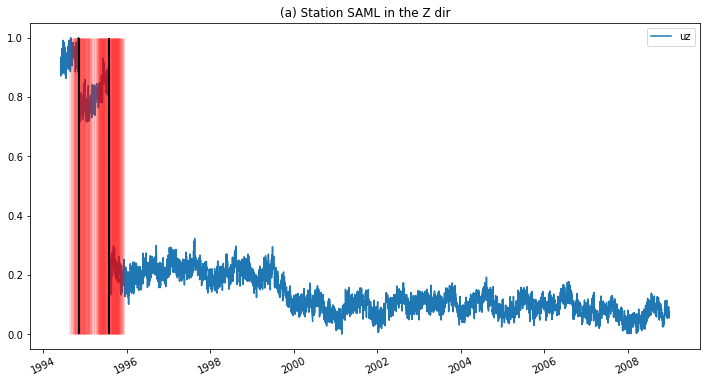

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))

np.random.seed(42)
x = np.random.rand(150)
plt.plot(df.set_index('date'), label='uz', );
plt.xticks(rotation=25);
plt.title("(a) Station SAML in the Z dir")
plt.legend();

ax.vlines(pred_dates, 0, 1, colors='red', alpha=0.07, linewidth = 7)
ax.vlines(list(offset_dates), 0, 1, colors='black', linewidth=2)

plt.savefig('../../vis2.jpg')